In [1]:
import os, io, zipfile, requests, shutil

# Modrinth resource pack slugs
urls = """
https://modrinth.com/resourcepack/allure-pack
https://modrinth.com/resourcepack/ashen
https://modrinth.com/resourcepack/bare-bones
https://modrinth.com/resourcepack/blockpixel
https://modrinth.com/resourcepack/candy-texture-pack
https://modrinth.com/resourcepack/cartoon-texture-pack
https://modrinth.com/resourcepack/chinese-mythology-mash-up
https://modrinth.com/resourcepack/city-texture-pack
https://modrinth.com/resourcepack/faithful-32x
https://modrinth.com/resourcepack/fallout-mashup
https://modrinth.com/resourcepack/fantasy-texture-pack
https://modrinth.com/resourcepack/festive-mash-up
https://modrinth.com/resourcepack/greek-mythology-mash-up
https://modrinth.com/resourcepack/halloween-mash-up
https://modrinth.com/resourcepack/kdcraft
https://modrinth.com/resourcepack/mass-effect-mash-up
https://modrinth.com/resourcepack/minecraft-lite-edition-wool-edition
https://modrinth.com/resourcepack/natural-texture-pack
https://modrinth.com/resourcepack/norse-mythology-mash-up
https://modrinth.com/resourcepack/pastelcraft
https://modrinth.com/resourcepack/pattern-texture-pack
https://modrinth.com/resourcepack/pirates-of-the-caribbean-mash-up
https://modrinth.com/resourcepack/pixel-perfection-legacy
https://modrinth.com/resourcepack/plastic-texture-pack
https://modrinth.com/resourcepack/pollachius
https://modrinth.com/resourcepack/steampunk-texture-pack
https://modrinth.com/resourcepack/super-cute
https://modrinth.com/resourcepack/super-mario-mash-up
https://modrinth.com/resourcepack/wind-waker-edition
""".strip().splitlines()

os.makedirs("texturepacks", exist_ok=True)

def is_block_dir(path):
    name = os.path.basename(path).lower()
    parent = os.path.basename(os.path.dirname(path)).lower()
    return parent == "textures" and name in {"block", "blocks"}

for url in urls:
    slug = url.rstrip("/").split("/")[-1]
    print(f"Fetching {slug}")
    r = requests.get(f"https://api.modrinth.com/v2/project/{slug}/version")
    r.raise_for_status()
    versions = r.json()
    if not versions:
        print("No versions found")
        continue

    file_url = versions[0]["files"][0]["url"]
    resp = requests.get(file_url)
    resp.raise_for_status()

    base = f"texturepacks/{slug}"
    if os.path.exists(base):
        shutil.rmtree(base)
    os.makedirs(base, exist_ok=True)

    with zipfile.ZipFile(io.BytesIO(resp.content)) as z:
        z.extractall(base)

    images_dir = os.path.join(base, "images")
    copied = 0
    for root, dirs, files in os.walk(base):
        if is_block_dir(root):
            os.makedirs(images_dir, exist_ok=True)
            for fn in files:
                if fn.lower().endswith(".png"):
                    src = os.path.join(root, fn)
                    dst = os.path.join(images_dir, fn)
                    if os.path.exists(dst):
                        stem, ext = os.path.splitext(fn)
                        i = 1
                        while os.path.exists(dst):
                            dst = os.path.join(images_dir, f"{stem}_{i}{ext}")
                            i += 1
                    shutil.copy2(src, dst)
                    copied += 1

    if copied:
        for item in os.listdir(base):
            path = os.path.join(base, item)
            if path != images_dir:
                shutil.rmtree(path, ignore_errors=True)
        print(f"Kept {images_dir}")
    else:
        print("No block textures copied")

print("All packs processed.")

Fetching allure-pack
Kept texturepacks/allure-pack/images
Fetching ashen
Kept texturepacks/ashen/images
Fetching bare-bones
Kept texturepacks/bare-bones/images
Fetching blockpixel
Kept texturepacks/blockpixel/images
Fetching candy-texture-pack
Kept texturepacks/candy-texture-pack/images
Fetching cartoon-texture-pack
Kept texturepacks/cartoon-texture-pack/images
Fetching chinese-mythology-mash-up
Kept texturepacks/chinese-mythology-mash-up/images
Fetching city-texture-pack
Kept texturepacks/city-texture-pack/images
Fetching faithful-32x
Kept texturepacks/faithful-32x/images
Fetching fallout-mashup
Kept texturepacks/fallout-mashup/images
Fetching fantasy-texture-pack
Kept texturepacks/fantasy-texture-pack/images
Fetching festive-mash-up
Kept texturepacks/festive-mash-up/images
Fetching greek-mythology-mash-up
Kept texturepacks/greek-mythology-mash-up/images
Fetching halloween-mash-up
Kept texturepacks/halloween-mash-up/images
Fetching kdcraft
Kept texturepacks/kdcraft/images
Fetching mas

In [2]:
from google.colab import drive

drive.mount('/content/drive')

os.makedirs('/root/.kaggle', exist_ok=True)

# Copy kaggle.json from your Drive home folder
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets list | head -n 10

Mounted at /content/drive
ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000           3843         97  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                    5941  2025-10-26 07:51:53.380000           4816         67  1.0              
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset        16151  2025-10-01 16:35:53.273000          19736     

In [3]:
# Download the Kaggle dataset and keep only PNGs in default/images

from kaggle.api.kaggle_api_extended import KaggleApi

DATASET = "urvishahir/minecraft-block-textures-dataset"
BASE = "default"
IMAGES = os.path.join(BASE, "images")

api = KaggleApi()
api.authenticate()

os.makedirs(BASE, exist_ok=True)
api.dataset_download_files(DATASET, path=BASE, unzip=True)

# Move all .png files into default/images
os.makedirs(IMAGES, exist_ok=True)
for root, _, files in os.walk(BASE):
    if os.path.abspath(root) == os.path.abspath(IMAGES):
        continue
    for fn in files:
        if fn.lower().endswith(".png"):
            src = os.path.join(root, fn)
            dst = os.path.join(IMAGES, fn)
            if os.path.abspath(src) == os.path.abspath(dst):
                continue
            if os.path.exists(dst):
                stem, ext = os.path.splitext(fn)
                i = 1
                while os.path.exists(dst):
                    dst = os.path.join(IMAGES, f"{stem}_{i}{ext}")
                    i += 1
            shutil.move(src, dst)

# Remove everything in default except the images folder
for item in os.listdir(BASE):
    path = os.path.join(BASE, item)
    if os.path.abspath(path) != os.path.abspath(IMAGES):
        if os.path.isdir(path):
            shutil.rmtree(path, ignore_errors=True)
        else:
            os.remove(path)

print(f"Kept {IMAGES}")

Dataset URL: https://www.kaggle.com/datasets/urvishahir/minecraft-block-textures-dataset
Kept default/images


In [4]:
from torch.utils.data import Dataset
from PIL import Image

class MinecraftTextureDataset(Dataset):
    def __init__(self, image_dir, pack_id="default", rgb_background=(128, 128, 128)):
        """
        Args:
            image_dir (str): Directory containing texture PNGs.
            pack_id (str): Name of the texture pack (e.g. 'ashen', 'default', etc.).
            rgb_background (tuple): RGB color to use as background for RGBA textures.
        """
        self.image_dir = image_dir
        self.pack_id = pack_id
        self.rgb_background = rgb_background

        # collect all PNGs
        self.image_files = sorted(
            [f for f in os.listdir(image_dir) if f.lower().endswith(".png")]
        )

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        path = os.path.join(self.image_dir, img_name)

        # open image and convert RGBA → RGB using the background
        img = Image.open(path).convert("RGBA")
        bg = Image.new("RGB", img.size, self.rgb_background)
        bg.paste(img, mask=img.split()[3])  # use alpha channel as mask
        image_rgb = bg

        texture_name = os.path.splitext(img_name)[0]

        return {
            "image_rgb": image_rgb,
            "texture_name": texture_name,
            "pack_id": self.pack_id,
        }

In [5]:
# Default dataset
default_dataset = MinecraftTextureDataset("default/images", pack_id="default")

# --- Remove unwanted textures (UI/destroy/overlay junk) ---
bad_textures = {
    "destroy_stage_0",
    "destroy_stage_1",
    "destroy_stage_2",
    "destroy_stage_3",
    "destroy_stage_4",
    "destroy_stage_5",
    "destroy_stage_6",
    "destroy_stage_7",
    "destroy_stage_8",
    "destroy_stage_9",
    "grass_block_side_overlay",
    "redstone_dust_overlay",
    "water_overlay"
}

# Strip file extensions and filter only for default dataset
default_dataset.image_files = [
    f for f in default_dataset.image_files
    if os.path.splitext(f)[0] not in bad_textures
]

# --- Drop non-square textures ---
filtered_files = []
for fname in default_dataset.image_files:
    path = os.path.join(default_dataset.image_dir, fname)
    with Image.open(path) as im:
        w, h = im.size
    if w == h:
        filtered_files.append(fname)

default_dataset.image_files = filtered_files

# Texture pack datasets (dictionary)
texturepacks_root = "texturepacks"
pack_datasets = {}

for pack_id in sorted(os.listdir(texturepacks_root)):
    pack_path = os.path.join(texturepacks_root, pack_id, "images")
    if os.path.isdir(pack_path):
        pack_datasets[pack_id] = MinecraftTextureDataset(pack_path, pack_id=pack_id)

print(f"Loaded {len(default_dataset)} default textures after filtering")
print(f"Loaded {len(pack_datasets)} texture pack datasets: {list(pack_datasets.keys())}")

Loaded 1020 default textures after filtering
Loaded 29 texture pack datasets: ['allure-pack', 'ashen', 'bare-bones', 'blockpixel', 'candy-texture-pack', 'cartoon-texture-pack', 'chinese-mythology-mash-up', 'city-texture-pack', 'faithful-32x', 'fallout-mashup', 'fantasy-texture-pack', 'festive-mash-up', 'greek-mythology-mash-up', 'halloween-mash-up', 'kdcraft', 'mass-effect-mash-up', 'minecraft-lite-edition-wool-edition', 'natural-texture-pack', 'norse-mythology-mash-up', 'pastelcraft', 'pattern-texture-pack', 'pirates-of-the-caribbean-mash-up', 'pixel-perfection-legacy', 'plastic-texture-pack', 'pollachius', 'steampunk-texture-pack', 'super-cute', 'super-mario-mash-up', 'wind-waker-edition']


In [6]:
def list_texture_names(dir_path):
    if not os.path.isdir(dir_path):
        return []
    names = []
    for fn in os.listdir(dir_path):
        if fn.startswith("."):
            continue  # skip hidden dotfiles
        if not fn.lower().endswith(".png"):
            continue
        names.append(os.path.splitext(fn)[0].strip().lower())
    return names

# ---- build default_names from the dataset  ----
default_names = set(os.path.splitext(f)[0].strip().lower()
                    for f in getattr(default_dataset, "image_files", []))
print(f"Default textures (from filtered dataset): {len(default_names)}\n")

total_with_default = len(default_names)
total_without_default = 0

# clean up each pack directory: remove anything not in default_names
for pack_id, ds in pack_datasets.items():
    pack_dir = getattr(ds, "image_dir", os.path.join("texturepacks", pack_id, "images"))
    pack_names = list_texture_names(pack_dir)
    removed = 0

    for fn in os.listdir(pack_dir):
        path = os.path.join(pack_dir, fn)
        name = os.path.splitext(fn)[0].strip().lower()
        # delete non-pngs, hidden files, or textures not in filtered default set
        if (
            fn.startswith(".")
            or not fn.lower().endswith(".png")
            or name not in default_names
        ):
            try:
                os.remove(path)
                removed += 1
            except FileNotFoundError:
                pass

    # rebuild dataset's image list to reflect deletions
    ds.image_files = sorted(
        [f for f in os.listdir(pack_dir) if f.lower().endswith(".png")]
    )

    print(f"{pack_id}: {len(pack_names)} textures; removed {removed}; kept {len(ds.image_files)}")
    total_without_default += len(ds.image_files)

print(f"\nTotal textures (default included): {total_with_default + total_without_default}")
print(f"Total textures (texture packs only): {total_without_default}")

Default textures (from filtered dataset): 1020

allure-pack: 1282 textures; removed 263; kept 1019
ashen: 2073 textures; removed 1068; kept 1005
bare-bones: 1113 textures; removed 102; kept 1011
blockpixel: 1220 textures; removed 211; kept 1009
candy-texture-pack: 1001 textures; removed 63; kept 938
cartoon-texture-pack: 844 textures; removed 61; kept 783
chinese-mythology-mash-up: 846 textures; removed 61; kept 785
city-texture-pack: 1073 textures; removed 67; kept 1006
faithful-32x: 1080 textures; removed 61; kept 1019
fallout-mashup: 1025 textures; removed 93; kept 932
fantasy-texture-pack: 1004 textures; removed 64; kept 940
festive-mash-up: 846 textures; removed 61; kept 785
greek-mythology-mash-up: 1073 textures; removed 67; kept 1006
halloween-mash-up: 1004 textures; removed 64; kept 940
kdcraft: 1289 textures; removed 368; kept 921
mass-effect-mash-up: 846 textures; removed 61; kept 785
minecraft-lite-edition-wool-edition: 961 textures; removed 62; kept 899
natural-texture-pack

=== Default dataset examples ===
name=stone | pack_id=default
type=<class 'PIL.Image.Image'>, size=(16, 16)


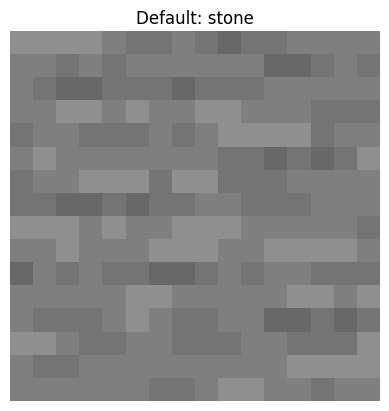

name=oak_planks | pack_id=default
type=<class 'PIL.Image.Image'>, size=(16, 16)


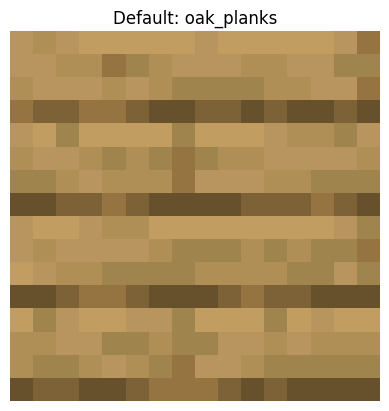

name=blue_stained_glass | pack_id=default
type=<class 'PIL.Image.Image'>, size=(16, 16)


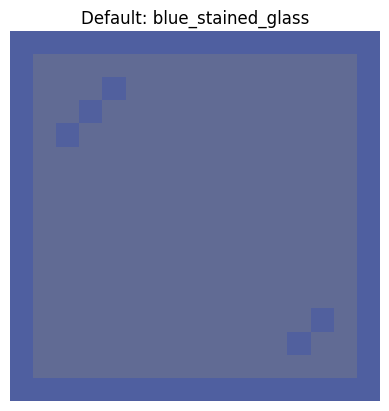

=== greek-mythology-mash-up examples ===
name=stone | pack_id=greek-mythology-mash-up
type=<class 'PIL.Image.Image'>, size=(32, 32)


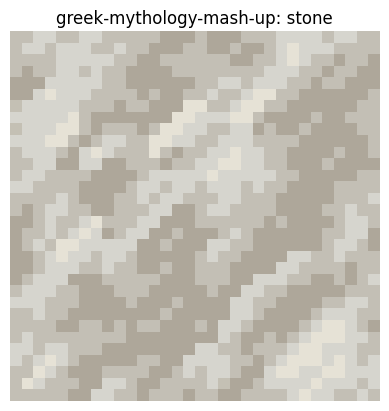

name=oak_planks | pack_id=greek-mythology-mash-up
type=<class 'PIL.Image.Image'>, size=(32, 32)


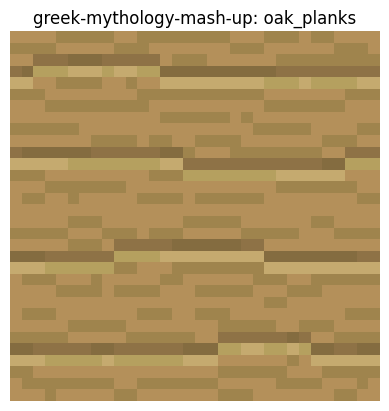

name=blue_stained_glass | pack_id=greek-mythology-mash-up
type=<class 'PIL.Image.Image'>, size=(32, 32)


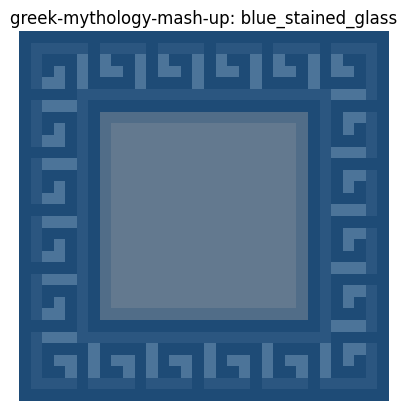

=== candy-texture-pack examples ===
name=stone | pack_id=candy-texture-pack
type=<class 'PIL.Image.Image'>, size=(16, 16)


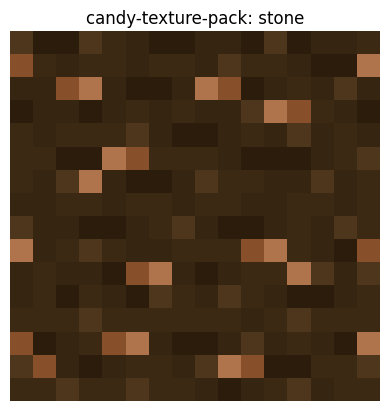

name=oak_planks | pack_id=candy-texture-pack
type=<class 'PIL.Image.Image'>, size=(16, 16)


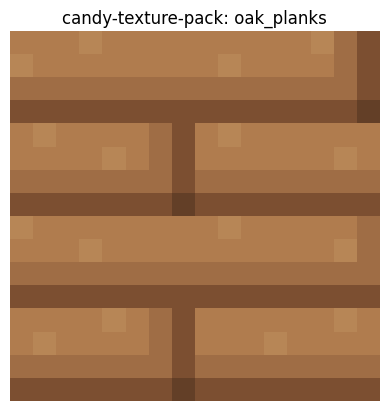

name=blue_stained_glass | pack_id=candy-texture-pack
type=<class 'PIL.Image.Image'>, size=(16, 16)


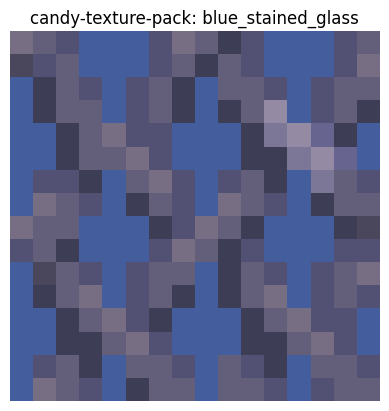

=== norse-mythology-mash-up examples ===
name=stone | pack_id=norse-mythology-mash-up
type=<class 'PIL.Image.Image'>, size=(32, 32)


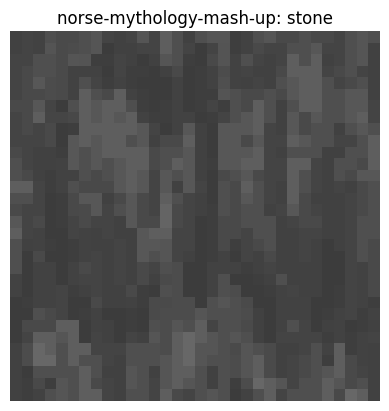

name=oak_planks | pack_id=norse-mythology-mash-up
type=<class 'PIL.Image.Image'>, size=(32, 32)


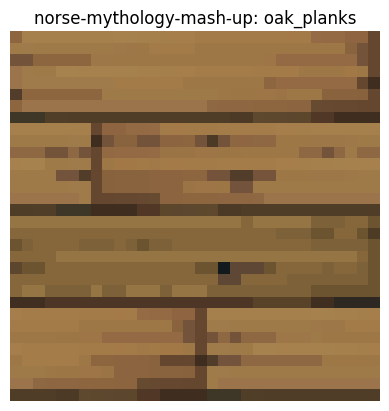

name=blue_stained_glass | pack_id=norse-mythology-mash-up
type=<class 'PIL.Image.Image'>, size=(32, 32)


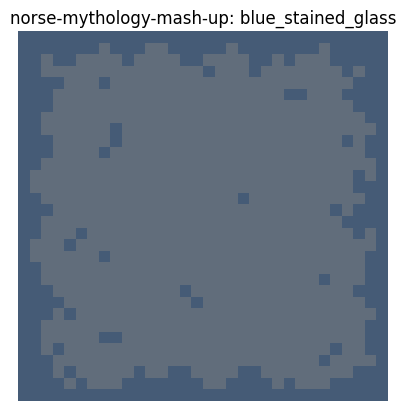

In [7]:
import matplotlib.pyplot as plt

example_textures = ["stone", "oak_planks", "blue_stained_glass"]
example_packs = ["greek-mythology-mash-up", "candy-texture-pack", "norse-mythology-mash-up"]

def get_image_by_name(ds, texture_name):
    name_lower = texture_name.lower()
    for f in ds.image_files:
        if os.path.splitext(f)[0].lower() == name_lower:
            sample = ds[ds.image_files.index(f)]
            return sample
    return None

# === show default examples ===
print("=== Default dataset examples ===")
for tex_name in example_textures:
    sample = get_image_by_name(default_dataset, tex_name)
    if sample is None:
        print(f"Texture not found in default: {tex_name}")
        continue
    img = sample["image_rgb"]
    print(f"name={sample['texture_name']} | pack_id={sample['pack_id']}")
    print(f"type={type(img)}, size={img.size}")
    plt.imshow(img)
    plt.title(f"Default: {sample['texture_name']}")
    plt.axis("off")
    plt.show()

# === show examples from selected packs ===
for pack_id in example_packs:
    ds = pack_datasets.get(pack_id)
    if ds is None:
        print(f"Skipping {pack_id} (not found)")
        continue

    print(f"=== {pack_id} examples ===")
    for tex_name in example_textures:
        sample = get_image_by_name(ds, tex_name)
        if sample is None:
            print(f"Missing in {pack_id}: {tex_name}")
            continue
        img = sample["image_rgb"]
        print(f"name={sample['texture_name']} | pack_id={sample['pack_id']}")
        print(f"type={type(img)}, size={img.size}")
        plt.imshow(img)
        plt.title(f"{pack_id}: {sample['texture_name']}")
        plt.axis("off")
        plt.show()

In [8]:
!pip install open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.9 MB/s eta 0:00:00


In [9]:
import torch
import open_clip

model_name = "ViT-L-14-336-quickgelu"
pretrained = "openai"

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model, _, preprocess = open_clip.create_model_and_transforms(model_name, pretrained=pretrained)
model.to(device)
model.eval()

print(f"Loaded {model_name} with weights '{pretrained}' on device: {device}")

cuda


Loaded ViT-L-14-336-quickgelu with weights 'openai' on device: cuda



TARGET: acacia_trapdoor


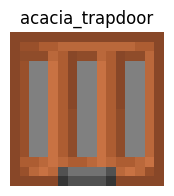


Top 10 text prompts for 'acacia_trapdoor':
0.321  minecraft texture of oxidized copper trapdoor
0.319  minecraft texture of copper trapdoor
0.316  minecraft texture of oxidized copper door bottom
0.314  minecraft texture of oxidized copper door top
0.313  minecraft texture of oxidized copper grate
0.312  minecraft texture of redstone lamp on
0.312  minecraft texture of copper grate
0.312  minecraft texture of repeater on
0.310  minecraft texture of weathered copper grate
0.309  minecraft texture of lightning rod on

TARGET: furnace_front


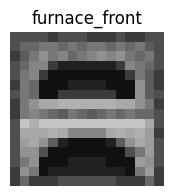


Top 10 text prompts for 'furnace_front':
0.297  minecraft texture of stonecutter top
0.295  minecraft texture of comparator
0.294  minecraft texture of stonecutter bottom
0.294  minecraft texture of stonecutter side
0.293  minecraft texture of detector rail
0.291  minecraft texture of repeater on
0.291  minecraft texture of activator rail
0.291  minecraft texture of end portal frame eye
0.291  minecraft texture of powered rail on
0.290  minecraft texture of activator rail on

TARGET: grass_block_side


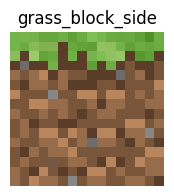


Top 10 text prompts for 'grass_block_side':
0.308  minecraft texture of soul soil
0.307  minecraft texture of dirt
0.301  minecraft texture of rooted dirt
0.297  minecraft texture of coarse dirt
0.297  minecraft texture of leaf litter
0.296  minecraft texture of dirt path top
0.296  minecraft texture of composter compost
0.295  minecraft texture of dirt path side
0.293  minecraft texture of gravel
0.287  minecraft texture of mud

TARGET: oak_log_top


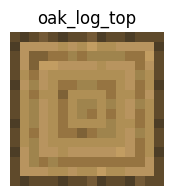


Top 10 text prompts for 'oak_log_top':
0.350  minecraft texture of brown candle
0.343  minecraft texture of brown terracotta
0.343  minecraft texture of brown concrete powder
0.341  minecraft texture of brown candle lit
0.338  minecraft texture of brown concrete
0.336  minecraft texture of comparator
0.335  minecraft texture of brown stained glass pane top
0.333  minecraft texture of copper trapdoor
0.333  minecraft texture of weathered copper trapdoor
0.332  minecraft texture of brown stained glass


In [10]:
# -------------------------
# SETTINGS
# -------------------------
TARGET_NAMES = [
    "acacia_trapdoor",
    "furnace_front",
    "grass_block_side",
    "oak_log_top",
]

TOP_K = 10

# -------------------------
# FIND MULTIPLE SAMPLES
# -------------------------
def find_sample(name):
    name = name.strip().lower()
    for sample in default_dataset:
        if sample["texture_name"].strip().lower() == name:
            return sample
    return None

# -------------------------
# TEXT PROMPTS (fixed)
# -------------------------
templates = [
    "{}",
    "minecraft texture of {}",
    "texture of {}",
]

all_names = sorted({s["texture_name"].strip().lower() for s in default_dataset})
all_prompts = []
for name in all_names:
    clean = name.replace("_", " ")
    for t in templates:
        all_prompts.append(t.format(clean))

# Encode all prompts once
with torch.no_grad():
    text_tokens = open_clip.tokenize(all_prompts).to(device)
    with torch.autocast(device_type=("cuda" if device == "cuda" else "cpu"),
                        enabled=(device == "cuda")):
        text_feats = model.encode_text(text_tokens)
    text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)


# -------------------------
# PROCESS EACH TARGET
# -------------------------
for TARGET_NAME in TARGET_NAMES:
    print("\n" + "="*50)
    print(f"TARGET: {TARGET_NAME}")
    print("="*50)

    # --- load texture ---
    sample = find_sample(TARGET_NAME)
    if sample is None:
        print(f"Could not find {TARGET_NAME}")
        continue

    # --- show texture ---
    plt.figure(figsize=(2, 2))
    plt.imshow(sample["image_rgb"])
    plt.axis("off")
    plt.title(TARGET_NAME)
    plt.show()

    # --- encode image ---
    with torch.no_grad():
        img_tensor = preprocess(sample["image_rgb"]).unsqueeze(0).to(device)
        with torch.autocast(device_type=("cuda" if device == "cuda" else "cpu"),
                            enabled=(device == "cuda")):
            img_feat = model.encode_image(img_tensor)
        img_feat = img_feat / img_feat.norm(dim=-1, keepdim=True)

    # --- similarity ---
    sims = (img_feat @ text_feats.T).squeeze(0)
    vals, inds = sims.topk(TOP_K)

    print(f"\nTop {TOP_K} text prompts for '{TARGET_NAME}':")
    for score, idx in zip(vals.tolist(), inds.tolist()):
        print(f"{score:.3f}  {all_prompts[idx]}")

As we can see, the default CLIP model does not accurately identify what a Minecraft texture represents, but it does capture coarse color and stylistic information. To isolate style, we compute a style embedding for each texture using L2-normalized CLIP image embeddings:

$$
\Delta(x)
=
\frac{\mathrm{CLIP}(x)}{\|\mathrm{CLIP}(x)\|}
\;-\;
\frac{\mathrm{CLIP}(x_{\text{default}})}{\|\mathrm{CLIP}(x_{\text{default}})\|}.
$$

Only the CLIP embeddings are normalized; the delta vectors themselves are not normalized, since their magnitude reflects the strength of the stylistic deviation from the default texture. Averaging these deltas across all textures in a pack, followed by a final normalization step, yields a compact representation of the pack’s overall style.

In [11]:
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

def _collate(batch):
    imgs = [preprocess(s["image_rgb"]) for s in batch]
    names = [s["texture_name"].strip().lower() for s in batch]
    return torch.stack(imgs, 0), names

@torch.inference_mode()
def _encode_dataset(dataset, batch_size=128, num_workers=2, pin_memory=True, desc=None):
    embs = {}
    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=pin_memory,
        persistent_workers=(num_workers > 0),
        collate_fn=_collate,
        drop_last=False,
    )
    pbar = tqdm(total=len(dataset), desc=desc, leave=False)
    for batch, names in loader:
        batch = batch.to(device, non_blocking=True)
        with torch.autocast(device_type=("cuda" if device == "cuda" else "cpu"), enabled=(device == "cuda")):
            e = model.encode_image(batch)
        e = e / e.norm(dim=-1, keepdim=True) # normalize image embedding
        for name, vec in zip(names, e):
            embs[name] = vec.detach().cpu()
        pbar.update(len(names))
    pbar.close()
    return embs

def _norm(name: str) -> str:
    return str(name).strip().lower()

print("Encoding default textures...")
default_embs = _encode_dataset(default_dataset, batch_size=128, desc="default")
print(f"Default encoded: {len(default_embs)}")

style_delta = {}
for pack_id, ds in pack_datasets.items():
    print(f"Encoding pack: {pack_id}")
    pack_embs = _encode_dataset(ds, batch_size=128, desc=f"{pack_id}")
    pack_deltas, missing, matched = {}, 0, 0
    for name, e_pack in pack_embs.items():
        e_def = default_embs.get(name)
        if e_def is None:
            missing += 1
            continue
        delta = (e_pack - e_def)
        pack_deltas[name] = delta
        matched += 1
    style_delta[pack_id] = pack_deltas
    print(f"{pack_id}: matched={matched}, missing_in_default={missing}, stored_deltas={len(pack_deltas)}")

print("Finished computing style_delta for all packs.")

Encoding default textures...


default:   0%|          | 0/1020 [00:00<?, ?it/s]

Default encoded: 1020
Encoding pack: allure-pack


allure-pack:   0%|          | 0/1019 [00:00<?, ?it/s]

allure-pack: matched=1019, missing_in_default=0, stored_deltas=1019
Encoding pack: ashen


ashen:   0%|          | 0/1005 [00:00<?, ?it/s]

ashen: matched=1005, missing_in_default=0, stored_deltas=1005
Encoding pack: bare-bones


bare-bones:   0%|          | 0/1011 [00:00<?, ?it/s]

bare-bones: matched=1011, missing_in_default=0, stored_deltas=1011
Encoding pack: blockpixel


blockpixel:   0%|          | 0/1009 [00:00<?, ?it/s]

blockpixel: matched=1009, missing_in_default=0, stored_deltas=1009
Encoding pack: candy-texture-pack


candy-texture-pack:   0%|          | 0/938 [00:00<?, ?it/s]

candy-texture-pack: matched=938, missing_in_default=0, stored_deltas=938
Encoding pack: cartoon-texture-pack


cartoon-texture-pack:   0%|          | 0/783 [00:00<?, ?it/s]

cartoon-texture-pack: matched=783, missing_in_default=0, stored_deltas=783
Encoding pack: chinese-mythology-mash-up


chinese-mythology-mash-up:   0%|          | 0/785 [00:00<?, ?it/s]

chinese-mythology-mash-up: matched=785, missing_in_default=0, stored_deltas=785
Encoding pack: city-texture-pack


city-texture-pack:   0%|          | 0/1006 [00:00<?, ?it/s]

city-texture-pack: matched=1006, missing_in_default=0, stored_deltas=1006
Encoding pack: faithful-32x


faithful-32x:   0%|          | 0/1019 [00:00<?, ?it/s]

faithful-32x: matched=1019, missing_in_default=0, stored_deltas=1019
Encoding pack: fallout-mashup


fallout-mashup:   0%|          | 0/932 [00:00<?, ?it/s]

fallout-mashup: matched=932, missing_in_default=0, stored_deltas=932
Encoding pack: fantasy-texture-pack


fantasy-texture-pack:   0%|          | 0/940 [00:00<?, ?it/s]

fantasy-texture-pack: matched=940, missing_in_default=0, stored_deltas=940
Encoding pack: festive-mash-up


festive-mash-up:   0%|          | 0/785 [00:00<?, ?it/s]

festive-mash-up: matched=785, missing_in_default=0, stored_deltas=785
Encoding pack: greek-mythology-mash-up


greek-mythology-mash-up:   0%|          | 0/1006 [00:00<?, ?it/s]

greek-mythology-mash-up: matched=1006, missing_in_default=0, stored_deltas=1006
Encoding pack: halloween-mash-up


halloween-mash-up:   0%|          | 0/940 [00:00<?, ?it/s]

halloween-mash-up: matched=940, missing_in_default=0, stored_deltas=940
Encoding pack: kdcraft


kdcraft:   0%|          | 0/921 [00:00<?, ?it/s]

kdcraft: matched=921, missing_in_default=0, stored_deltas=921
Encoding pack: mass-effect-mash-up


mass-effect-mash-up:   0%|          | 0/785 [00:00<?, ?it/s]

mass-effect-mash-up: matched=785, missing_in_default=0, stored_deltas=785
Encoding pack: minecraft-lite-edition-wool-edition


minecraft-lite-edition-wool-edition:   0%|          | 0/899 [00:00<?, ?it/s]

minecraft-lite-edition-wool-edition: matched=899, missing_in_default=0, stored_deltas=899
Encoding pack: natural-texture-pack


natural-texture-pack:   0%|          | 0/1006 [00:00<?, ?it/s]

natural-texture-pack: matched=1006, missing_in_default=0, stored_deltas=1006
Encoding pack: norse-mythology-mash-up


norse-mythology-mash-up:   0%|          | 0/857 [00:00<?, ?it/s]

norse-mythology-mash-up: matched=857, missing_in_default=0, stored_deltas=857
Encoding pack: pastelcraft


pastelcraft:   0%|          | 0/596 [00:00<?, ?it/s]

pastelcraft: matched=596, missing_in_default=0, stored_deltas=596
Encoding pack: pattern-texture-pack


pattern-texture-pack:   0%|          | 0/785 [00:00<?, ?it/s]

pattern-texture-pack: matched=785, missing_in_default=0, stored_deltas=785
Encoding pack: pirates-of-the-caribbean-mash-up


pirates-of-the-caribbean-mash-up:   0%|          | 0/941 [00:00<?, ?it/s]

pirates-of-the-caribbean-mash-up: matched=941, missing_in_default=0, stored_deltas=941
Encoding pack: pixel-perfection-legacy


pixel-perfection-legacy:   0%|          | 0/923 [00:00<?, ?it/s]

pixel-perfection-legacy: matched=923, missing_in_default=0, stored_deltas=923
Encoding pack: plastic-texture-pack


plastic-texture-pack:   0%|          | 0/1011 [00:00<?, ?it/s]

plastic-texture-pack: matched=1011, missing_in_default=0, stored_deltas=1011
Encoding pack: pollachius


pollachius:   0%|          | 0/699 [00:00<?, ?it/s]

pollachius: matched=699, missing_in_default=0, stored_deltas=699
Encoding pack: steampunk-texture-pack


steampunk-texture-pack:   0%|          | 0/783 [00:00<?, ?it/s]

steampunk-texture-pack: matched=783, missing_in_default=0, stored_deltas=783
Encoding pack: super-cute


super-cute:   0%|          | 0/941 [00:00<?, ?it/s]

super-cute: matched=941, missing_in_default=0, stored_deltas=941
Encoding pack: super-mario-mash-up


super-mario-mash-up:   0%|          | 0/1013 [00:00<?, ?it/s]

super-mario-mash-up: matched=1013, missing_in_default=0, stored_deltas=1013
Encoding pack: wind-waker-edition


wind-waker-edition:   0%|          | 0/946 [00:00<?, ?it/s]

wind-waker-edition: matched=946, missing_in_default=0, stored_deltas=946
Finished computing style_delta for all packs.


In [12]:
print("Computing normalized average style deltas...")

norm_avg_style_delta = {}
for pack_id, deltas in style_delta.items():
    if not deltas:
        continue
    # stack all style deltas for this pack
    vecs = torch.stack(list(deltas.values()))
    avg_vec = vecs.mean(dim=0)
    # normalize the average style delta
    avg_vec = avg_vec / avg_vec.norm(dim=-1, keepdim=True)
    norm_avg_style_delta[pack_id] = avg_vec

print(f"Computed normalized average style deltas for {len(norm_avg_style_delta)} packs.")

Computing normalized average style deltas...
Computed normalized average style deltas for 29 packs.


UMAP package path: /usr/local/lib/python3.12/dist-packages/umap/__init__.py
Using 2723 vectors across 3 packs.
UMAP(n_jobs=1, random_state=42, verbose=True)
Fri Nov 14 04:20:43 2025 Construct fuzzy simplicial set


Fri Nov 14 04:20:50 2025 Finding Nearest Neighbors
Fri Nov 14 04:20:50 2025 Finished Nearest Neighbor Search
Fri Nov 14 04:20:50 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Nov 14 04:20:55 2025 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


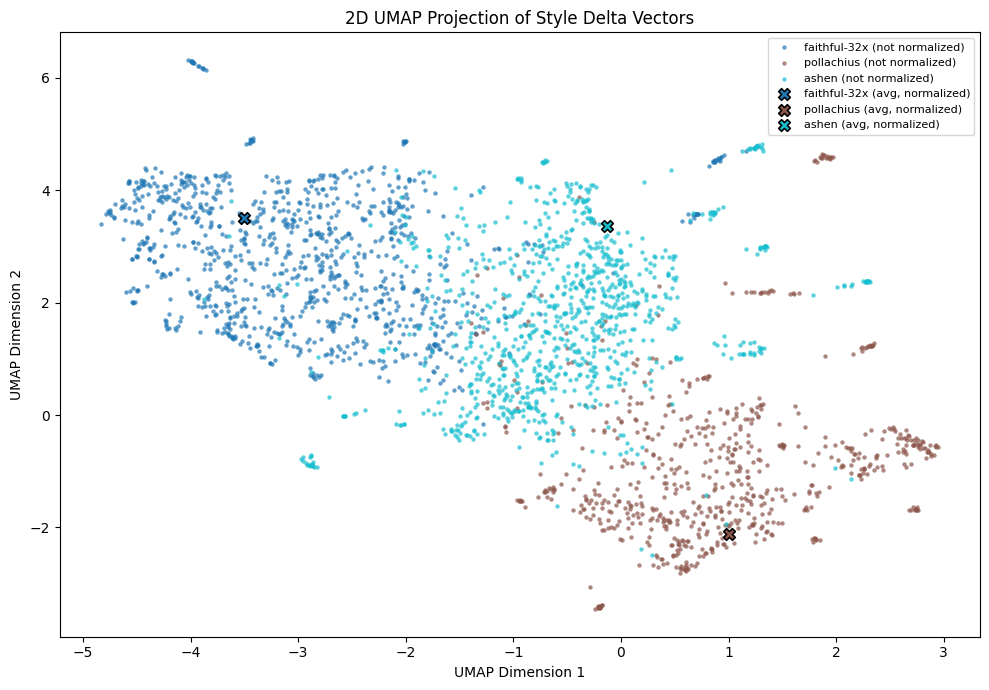

In [13]:
# --- UMAP visualization of selected packs: per-texture deltas + avg (normalized) ---
from umap.umap_ import UMAP
import numpy as np
from matplotlib import cm
import umap

print("UMAP package path:", umap.__file__)  # sanity check

# ===== choose which packs to visualize =====
packs_to_plot = [
    "faithful-32x",
    "pollachius",
    "ashen"
]

# ===== gather delta vectors from style_delta =====
all_vecs, all_labels = [], []
for pack_id in packs_to_plot:
    rows = style_delta.get(pack_id)  # dict[name] -> delta tensor
    if not rows:
        print(f"Skipping {pack_id} (not in style_delta or empty)")
        continue
    for v in rows.values():
        if isinstance(v, torch.Tensor):
            v = v.detach().cpu().numpy()
        all_vecs.append(v)
        all_labels.append(pack_id)

if not all_vecs:
    raise RuntimeError("No vectors collected—check packs_to_plot and style_delta.")

all_vecs = np.stack(all_vecs)
print(f"Using {len(all_vecs)} vectors across {len(set(all_labels))} packs.")

# ===== run UMAP on raw (not normalized) style deltas =====
reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,
    min_dist=0.10,
    verbose=True,
)
emb = reducer.fit_transform(all_vecs)  # [N, 2]

# ===== prepare normalized average vectors from norm_avg_style_delta, then map to 2D =====
uniq_packs = list(dict.fromkeys([p for p in packs_to_plot if p in set(all_labels)]))
avg_vecs, avg_labels = [], []
for p in uniq_packs:
    v = norm_avg_style_delta.get(p)
    if v is None:
        print(f"Warning: no normalized average for {p} in norm_avg_style_delta; skipping avg marker")
        continue
    if isinstance(v, torch.Tensor):
        v = v.detach().cpu().numpy()
    avg_vecs.append(v)
    avg_labels.append(p)

emb_avgs = reducer.transform(np.stack(avg_vecs)) if avg_vecs else np.empty((0, 2))

# ===== plot  =====
colors = cm.tab10(np.linspace(0, 1, len(uniq_packs)))
pack_color = {p: colors[i] for i, p in enumerate(uniq_packs)}

plt.figure(figsize=(10, 7))

# per-pack clouds (not normalized)
for p in uniq_packs:
    mask = np.array([lbl == p for lbl in all_labels])
    plt.scatter(
        emb[mask, 0], emb[mask, 1],
        s=10, alpha=0.7, lw=0,
        color=pack_color[p],
        label=f"{p} (not normalized)"
    )

# compact, bold average X markers (normalized)
for i, p in enumerate(avg_labels):
    x, y = emb_avgs[i]
    plt.scatter(
        x, y,
        color=pack_color[p],
        marker='X',         # filled, symmetric X
        s=70,               # compact
        linewidth=1.2,      # neat outline
        edgecolor='black',
        zorder=10,
        label=f"{p} (avg, normalized)"
    )

plt.title("2D UMAP Projection of Style Delta Vectors")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(markerscale=1.0, fontsize=8, frameon=True)
plt.tight_layout()
plt.show()

In [14]:
from typing import List, Iterable

# ------------ config ------------
SUFFIXES = ["", "aesthetic", "vibe", "style", "texture"]
TOPK = 8

# ------------ hardcoded base terms ------------
BASE_TERMS = [
    "super mario bros", "super mario", "mario", "nintendo", "mushroom kingdom",
    "the legend of zelda", "legend of zelda", "wind waker", "breath of the wild",

    "pirates", "pirate", "pirates of the caribbean", "ships", "ocean", "sea", "caribbean",
    "viking", "norse", "greek", "chinese", "oriental", "olympic",

    "spooky", "halloween", "haunted", "festive", "christmas", "winter", "snowy",
    "candy", "candyland", "pastel", "kawaii",

    "cartoon", "steampunk", "medieval", "fantasy", "dark fantasy",
    "plastic", "lego like", "toy", "simple", "simplified", "flat",

    "patterned", "blocky", "polka dots", "checker",
    "rustic", "stonework", "lilac", "gears",

    "ornate", "royale", "palace", "norse mythology",
    "chinese mythology", "porcelain",

    "nuclear", "wasteland", "fallout", "mass effect",
]


# ------------ helpers ------------

def build_labels_from_titles(titles: Iterable[str], suffixes: List[str]) -> List[str]:
    labels, seen = [], set()
    for t in titles:
        t = t.strip()
        if not t:
            continue
        for suf in suffixes:
            phrase = t if suf == "" else f"{t} {suf}"
            if phrase not in seen:
                seen.add(phrase)
                labels.append(phrase)
    return labels

@torch.inference_mode()
def encode_text_labels(model, labels: List[str], device: str, batch_size: int = 256) -> torch.Tensor:
    embs = []
    devtype = ("cuda" if str(device).startswith("cuda")
               else ("mps" if str(device).startswith("mps") else "cpu"))
    use_amp = devtype in ("cuda", "mps")
    pbar = tqdm(total=len(labels), desc="Encoding text labels", unit="labels")
    for start in range(0, len(labels), batch_size):
        end = min(start + batch_size, len(labels))
        toks = open_clip.tokenize(labels[start:end]).to(device, non_blocking=True)
        with torch.autocast(device_type=devtype, enabled=use_amp):
            e = model.encode_text(toks)
        e = e / e.norm(dim=-1, keepdim=True)
        embs.append(e.cpu() if devtype != "cpu" else e)
        pbar.update(end - start)
    pbar.close()
    return torch.cat(embs, dim=0)

# ------------ build & encode label bank from BASE_TERMS ------------

base_labels = build_labels_from_titles(sorted(set(BASE_TERMS)), SUFFIXES)
print(f"Base terms: {len(base_labels)} labels")

base_embs = encode_text_labels(model, base_labels, device)

# ------------ prepare pack style vectors ------------

pack_ids, pack_vecs = [], []
for pid, vec in norm_avg_style_delta.items():
    v = vec if isinstance(vec, torch.Tensor) else torch.as_tensor(vec)
    v = v.to(device, non_blocking=True)
    v = v / v.norm(dim=-1, keepdim=True)
    pack_ids.append(pid)
    pack_vecs.append(v)

pack_mat = torch.stack(pack_vecs, dim=0)  # [num_packs, d]

# ------------ per-pack reporting vs BASE_TERMS ------------

for pi, pid in enumerate(pack_ids):
    print(f"\n=== {pid} ===")
    scores = (pack_mat[pi:pi+1] @ base_embs.to(device, non_blocking=True).T).squeeze(0)
    topv, topi = torch.topk(scores, k=min(TOPK, scores.shape[0]))
    for rank, (idx, val) in enumerate(zip(topi.tolist(), topv.tolist()), 1):
        print(f"{rank:2d}. {base_labels[idx]:40s}  cos={val: .4f}")


Base terms: 310 labels


Encoding text labels:   0%|          | 0/310 [00:00<?, ?labels/s]


=== allure-pack ===
 1. lilac aesthetic                           cos= 0.1537
 2. lilac vibe                                cos= 0.1333
 3. candy aesthetic                           cos= 0.1299
 4. mushroom kingdom aesthetic                cos= 0.1279
 5. candyland aesthetic                       cos= 0.1262
 6. wind waker aesthetic                      cos= 0.1247
 7. patterned aesthetic                       cos= 0.1141
 8. blocky aesthetic                          cos= 0.1092

=== ashen ===
 1. viking aesthetic                          cos= 0.1154
 2. steampunk texture                         cos= 0.1119
 3. legend of zelda texture                   cos= 0.1100
 4. dark fantasy texture                      cos= 0.1099
 5. medieval aesthetic                        cos= 0.1041
 6. rustic texture                            cos= 0.1035
 7. ornate texture                            cos= 0.1015
 8. rustic aesthetic                          cos= 0.1008

=== bare-bones ===
 1. cartoon aest

Although style cannot be captured perfectly with single words, the CLIP similarity results show that each pack’s style embedding aligns with sensible, recognizable themes. The top terms often match the expected aesthetics (e.g., candyland, lilac, blocky, fallout, steampunk, spooky), indicating that the average style deltas capture a meaningful stylistic direction for each pack.